# NAND Performances Analysis: garbage collection parameters (time)

This simulation tries to understand the different performances of a NAND disk varying the garbage collector parameters. In this simulation the garbage collector activation time is changes while the percentage of dirty pages in a block is keept constant (40%, as seen in a previous test).

This simulation collects 100 K samples based on host write requests. The simulation runs a random writes of pages, 4 KiB each. So, the total amount of data to be written is 390.625 [MiB].

There are various NAND cells simulated. All NANDs have the following common features:

* page size:               4096 [Bytes] (4 [KiB]);
* pages per block:         128 [#];
* total blocks;            256 [#];
* total pages;             32768 [#];
* capacity:                128 [MiB];
* page write time:         45 [µs];
* page read time:          120 [µs];
* block erase time:        1500 [µs];
* max bandwidth read:      32.55 [MiB\s] (theoretical);
* max bandwidth write:     86.81 [MiB\s] (theoretical);

Then, every NAND has a different garbage collector parameter:

* **t1** activation every 1 µs (always);
* **t500** activation every 500 µs;
* **t5000** activation every 5 ms;
* **t50000** activation every 50 ms;
* **t500000** activation every 0.5 s;
* **t5000000** activation every 5 s.

In [1]:
# initialize
%matplotlib inline
import matplotlib.pyplot as plt
from simulator import analysis_helper as ah

# read the simulation data
sim_names = ("t1", "t500", "t5000", "t50000", "t500000", "t5000000")
data = ah.load_data(sim_names, "../RESULTS/simple_gc_test_1/")

## Page written host vs disk
This plot is in logaritmic scale and compares the host write requests (_x axis_) versus the effective disk writes (_y axis_). Ideally it should be linear: every host request correspond to a single disk write. Yet, due to the garbage collection or disk errors (_ie: disk is full_) the behaviour may change. 

All results are quite similar except for **t5000000**: it is unable to fulfil the host requests.

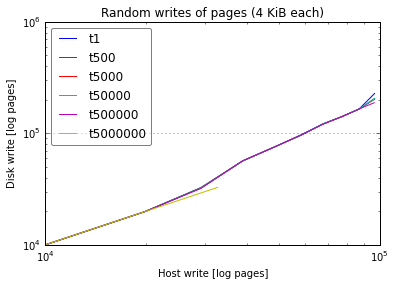

In [2]:
ah.inline_plot(sim_names, data, yid=6, xlog=True, ylog=True, show=False,
                xlabel="Host write [log pages]",
                ylabel="Disk write [log pages]")
# need extra parameters to better plotting
plt.axis([10 ** 4, 10 ** 5, 10 ** 4, 10 ** 6])  # [xmin, xmax, ymin, ymax]
plt.show()

## Host write time

This plot shows how much time is elapsed respect to the host write requests.

The best result is **t500000**, running roughly 22 seconds to write 100 K pages.

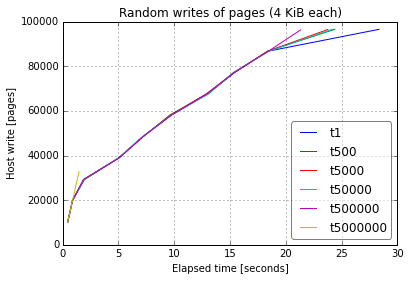

In [3]:
ah.plot_disk_write_time(sim_names, data)

## IOPS over written pages

This plot shows the IOPS as seen by the host over the write requests.

The best result is **t500000** with 13125 IOPS.

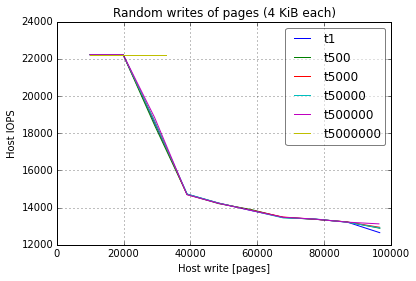

In [4]:
ah.plot_iops(sim_names, data)

## Amplification factor over written pages

This plot shows the amplification factor as seen by the host over the write requests. The amplification factor is defined as:
$$ A_f = \frac{W_s}{W_h} $$

Where:

* $W_s$ is the number of pages written actually by the disk;
* $W_h$ is the number of pages the host requests to write.

The best result is **t500000** with an amplification factor of 1.95.

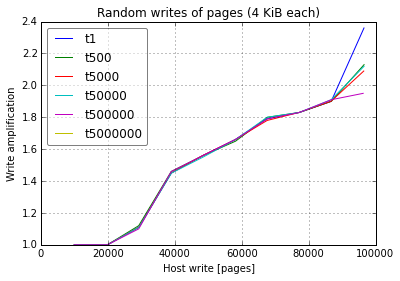

In [5]:
ah.plot_disk_af(sim_names, data)

## Write bandwidth over written pages

This plot shows the write bandwidth as seen by the host over the write requests.

The best result is **t500000** with a bandwidth of 17.63 MiB/s.

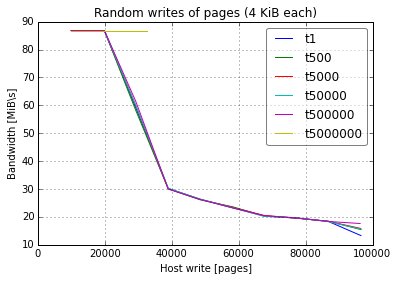

In [6]:
ah.plot_bandwidth(sim_names, data)

## Dirty pages over written pages

This plot shows the number of dirty pages over the write requests.

**t500000** is the garbage collector that keeps the higher number of dirty pages (on average), yet the overall performances are better.

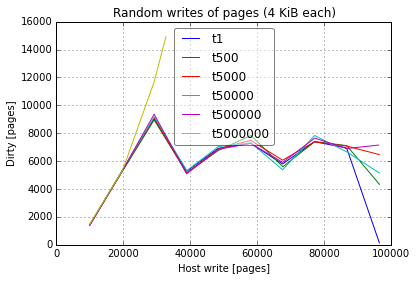

In [7]:
ah.plot_dirty_pages(sim_names, data)

## Write failures over written pages

This plot shows the number of failures (page not written due to disk errors) over the write requests.

All disks are able to fulfil the host requests except for **t5000000**: this gc is unable to clean the disk in time, so the disk becames full and is no longer able to write (or modify) the pages.

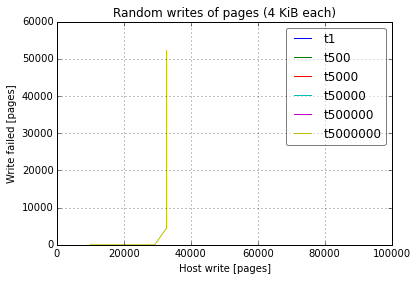

In [8]:
ah.plot_write_faiures(sim_names, data)

## Conclusions

**t500000** is the clear winner: is able to keep the disk working with the best performances. Is interesting to notice that the worst case is with **t5000000** and not **t1**. In fact more the garbage collector is never executed, so the disk becames useless.